<center>
    <h1>Pattern Analysis | SS20</h1>
    <hr>
    <br>
    <div style="margin:0 60px 0px 0">
        <img src="imgs/pat.jpg" width=200px align=center>
    </div>
    <h3>Exercises for </h3>
    <h2>Pattern Analysis Programming</h2>
    <br>
</center>

# Transforming an Unsupervised Task to a Supervised Task

`Task 4: May 13 – Mai 20`

- [Exercise 1](#1) 
- [Exercise 2](#2)

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, norm
from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting 
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from scipy.ndimage import gaussian_filter
import scipy
np.random.seed(42)

<a name='1'></a>

# Exercise 1

(768, 1024)


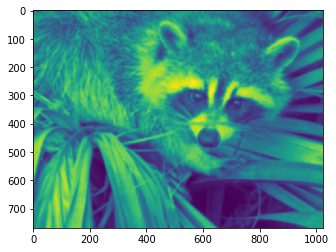

In [2]:
img = scipy.misc.face(gray=True)
img_filtered = gaussian_filter(img, sigma=3)
print(img_filtered.shape)
plt.imshow(img_filtered);

In [3]:
n = 50000

new_pdf = img_filtered.flatten() 

new_img = np.zeros(len(new_pdf))

cdf = np.cumsum(new_pdf) 

In [4]:
## foreground

rvs_f = np.random.uniform(np.min(cdf), np.max(cdf), n) 

new_ones_f = np.searchsorted(cdf, rvs_f) 

for pixel in new_ones_f:
    new_img[pixel] = 1

In [5]:
## background

rvs_b = np.random.uniform(0, len(new_pdf), n) 

for pixel in rvs_b:
    new_img[int(pixel)] = 0.5

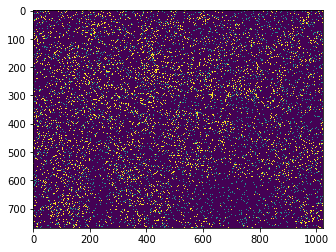

In [6]:
plt.imshow(new_img.reshape(img.shape[0], img.shape[1]));

In [7]:
img = new_img.reshape(img.shape[0], img.shape[1])

In [8]:
xf = np.where(img == 1)
xb = np.where(img == 0.5)

x1 = np.vstack((xf[0], xf[1])).T
x2 = np.vstack((xb[0], xb[1])).T

train = np.vstack((x1,x2))

y = np.zeros(len(train))
y[:len(x1)] = 1

In [39]:
rf = RandomForestRegressor(n_estimators=20, max_depth=10)
rf.fit(train, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [40]:
x_test = np.tile(np.arange(img.shape[1]), (img.shape[0], 1))

In [41]:
results = []

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        results.append([i,j])

In [42]:
rf_pred = rf.predict(results)

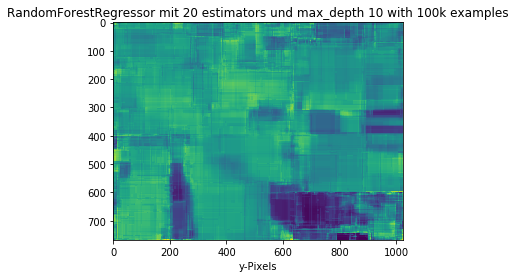

In [43]:
plt.imshow(rf_pred.reshape(img.shape[0], img.shape[1]))
plt.title("RandomForestRegressor mit 20 estimators und max_depth 10 with 100k examples")
plt.xlabel("X-Pixels")
plt.xlabel("y-Pixels")
plt.show()

<a name='2'></a>

# Exercise 2 - Extra Trees Classifier

In [35]:
etc = ExtraTreesRegressor(n_estimators=20, max_depth=10, random_state=0)
etc.fit(train, y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=10, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=20, n_jobs=None, oob_score=False,
                    random_state=0, verbose=0, warm_start=False)

In [36]:
results = []

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        results.append([i,j])

In [37]:
etc_pred = etc.predict(results)

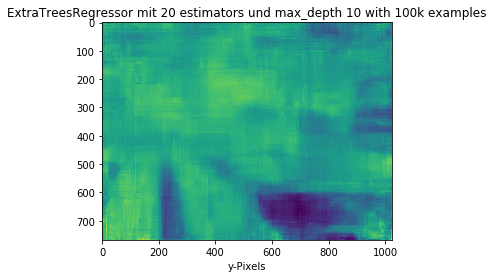

In [38]:
plt.imshow(etc_pred.reshape(img.shape[0], img.shape[1]))
plt.title("ExtraTreesRegressor mit 20 estimators und max_depth 10 with 100k examples")
plt.xlabel("X-Pixels")
plt.xlabel("y-Pixels")
plt.show()

## Optional K-Fold Cross

In [18]:
k = 4
e = 10**(-100)

n_estimators=np.arange(10,30)
max_depths=np.arange(3,20)

summed_log_p = np.zeros(len(hs))

for x, md in enumerate(max_depths):
    
    kfold_set = []
    
    for i in range(k):
        image_skeleton = np.zeros((img.shape[0], img.shape[1])).flatten()
        image_skeleton[i::md] = train[i::md]
        kfold_set.append(image_skeleton)
        
    kfold_set = np.array(kfold_set)
    test_set = kfold_set[-1]
    
    current_p_x = 0
    
    for _ in range(kfold_set.shape[0] - 1):
        #reconstructed = parzen_window_estimator(size, h, kfold_set[i]).flatten()
        
        etc = ExtraTreesRegressor(n_estimators=20, max_depth=md, random_state=0)
        
        etc_pred = etc.fit(kfold_set[i], ) 
        
        
        
        reconstructed = etc.predict(etc_pred)
        
        
        non_zero_inc = np.nonzero(test_set)
        test_ind_train = reconstructed[non_zero_inc] + e
        p_x = np.sum(np.log(test_ind_train))
        current_p_x += p_x
        
    summed_log_p[x] = current_p_x

NameError: name 'hs' is not defined